In [1]:
# importing
import pandas as pd

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [2]:
#upload files to colab
from google.colab import files
uploaded = files.upload()

Saving sample.sqlite to sample.sqlite


Supercell Data Scientist Challenge

You've received a SQLite3 database sample.sqlite as an attachment containing sample
data from a hypothetical free-to-play mobile game (see section The Data for details).
Your task is to use this data set to answer the questions below and prepare a report of
your findings.
The report should be written to an audience that consists of game and business
developers and it will be reviewed on actionability, insightfulness and clarity.
Please return your report as a PDF file to datascience-challenge@supercell.com and
attach all your code and plots. Please send your plots embedded in the report or
separately in PDF or PNG format.


The Data

The database contains three tables: account, account_date_session and iap_purchase.
account contains user profiles, iap_purchase contains in-app purchases by the users,
and account_date_session contains the number of sessions for the users for the days
they have been active. All the tables contain data for the year of 2016.
You can access the SQLite3 database by command line interface sqlite3. There are
also libraries for R and python.
We'd prefer that you complete the assignment using SQL, R, and/or python but feel free
to use any tools that you think are suitable for the job. The only criteria is still that the
plots you do should be reproducible with the code you are writing.
We will assess the visualisation based on clarity and readability, and your conclusions
based on actionability and insightfulness.

In [3]:
import sqlite3
# Create your connection.
cnx = sqlite3.connect('sample.sqlite')

account = pd.read_sql_query("SELECT * FROM account", cnx)

In [4]:
account.sample(5)

,account_id,created_time,created_device,created_platform,country_code,created_app_store_id
18189,25781915610,2016-01-02 05:35:50.172,Lenovo A850,Android,CN,4
84094,47260118592,2016-09-19 12:58:39.915,CAM-TL00H,Android,CN,4
72102,38668792250,2016-05-21 06:05:00.295,A31,Android,CN,7
43078,30077482866,2016-02-07 02:32:59.802,Zera F,Android,RU,2
80842,4310785624,2016-09-12 21:01:17.238,M821,Android,CN,19


In [5]:
account_date_session = pd.read_sql_query("SELECT * FROM account_date_session", cnx)

In [6]:
account_date_session.sample(5)

,account_id,date,session_count,session_duration_sec
762852,13507860,2016-04-07,5,1127
617734,30078549092,2016-04-28,5,1970
1533212,4311241432,2016-10-29,2,2447
195610,25782611986,2016-02-09,2,1546
60764,4308162950,2016-02-11,5,1656


In [7]:
iap_purchase = pd.read_sql_query("SELECT * FROM iap_purchase", cnx)
iap_purchase.sample(5)

,account_id,created_time,package_id_hash,iap_price_usd_cents,app_store_id
4256,60143451700,2016-07-08 12:25:34.729,99a9e0e63efa2fdce8fc8de74c66cea9,184,2
968,12438367,2016-01-31 10:56:40.757,ae0253c27c34edd1ab4fe21d6bfc91f8,739,0
8755,8602184916,2016-01-09 04:39:58.297,99a9e0e63efa2fdce8fc8de74c66cea9,184,0
1245,8603836527,2016-08-05 05:49:36.833,99a9e0e63efa2fdce8fc8de74c66cea9,184,2
1955,55846384622,2016-03-16 17:42:52.31,dd4c1bda4f2c904075fb2fbfcf30f30e,369,0


Warmup! Revenue and Active Users

Pick either one of the two. To limit the scope, maybe keep it down to a few plots and
text/conclusions to accompany them. If you want, you can add more plots in a possible
appendix, if any.
Are there any trends visible in the revenue or the daily active users? Visualise and
explain your observations.
Analyse the geographic split of the revenue and the users. What are your
observations of the results?

In [8]:
iap_purchase.groupby(by = 'app_store_id').iap_price_usd_cents.sum()

app_store_id
0     2267872
1      686596
2      808720
3       78450
4       55726
6        9287
7       82318
8       48222
10     142244
11        324
14        254
15       5700
16      26219
19      39930
Name: iap_price_usd_cents, dtype: int64

<Axes: xlabel='app_store_id'>

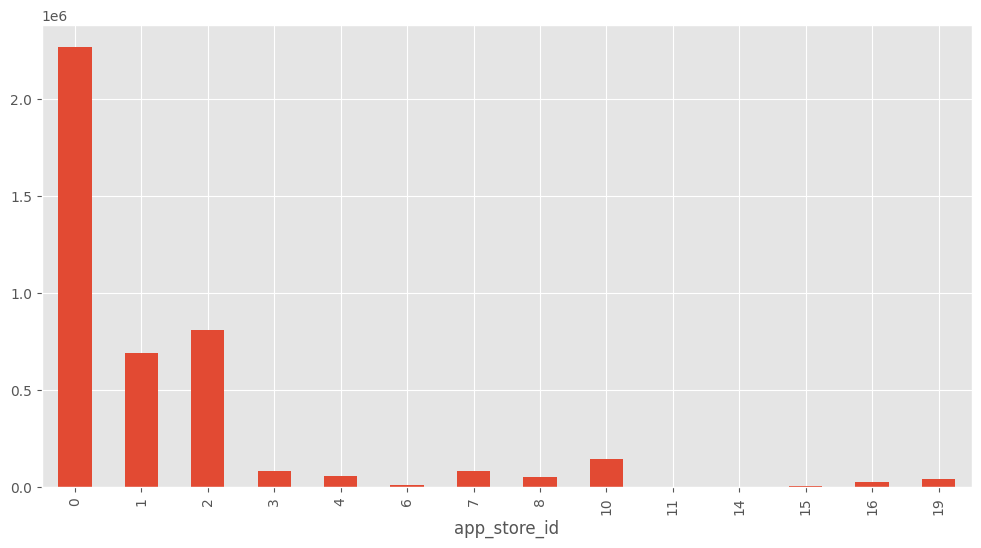

In [9]:
data1 = iap_purchase.groupby(by = 'app_store_id').iap_price_usd_cents.sum()
data1.plot.bar()

There are 3 major sotre in terms of total money spent for in app purchases.

In [10]:
account_date_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698974 entries, 0 to 1698973
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   account_id            object
 1   date                  object
 2   session_count         int64 
 3   session_duration_sec  int64 
dtypes: int64(2), object(2)
memory usage: 51.8+ MB


In [11]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112792 entries, 0 to 112791
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   account_id            112792 non-null  object
 1   created_time          112792 non-null  object
 2   created_device        112792 non-null  object
 3   created_platform      112792 non-null  object
 4   country_code          112685 non-null  object
 5   created_app_store_id  112792 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.2+ MB


In [12]:
merged1 = account_date_session.merge(account, on = 'account_id')
merged1.sample(5)

,account_id,date,session_count,session_duration_sec,created_time,created_device,created_platform,country_code,created_app_store_id
43973,34372431220,2016-09-14,1,444,2016-02-06 11:19:41.403,SM-J100H,Android,PT,2
11544,30076933350,2016-01-20,12,5059,2016-01-09 20:55:18.414,SM-G925F,Android,FR,2
902167,12898769400,2016-05-10,1,293,2016-04-16 15:49:46.492,R7Plus,Android,CN,7
435446,12897169040,2016-02-28,3,1647,2016-01-07 13:32:42.691,ZTE Blade C341,Android,DE,2
1576882,47258779074,2016-05-28,14,3024,2016-05-25 17:03:14.571,"iPad5,1",iOS,DE,1


In [13]:
merged1[merged1['created_app_store_id'] == 0][['country_code','created_app_store_id']]

,country_code,created_app_store_id
120154,BR,0
120155,BR,0
120156,BR,0
120157,BR,0
120158,BR,0
...,...,...
772599,TR,0
772600,TR,0
1307217,CN,0
1307218,CN,0


<Axes: xlabel='created_app_store_id'>

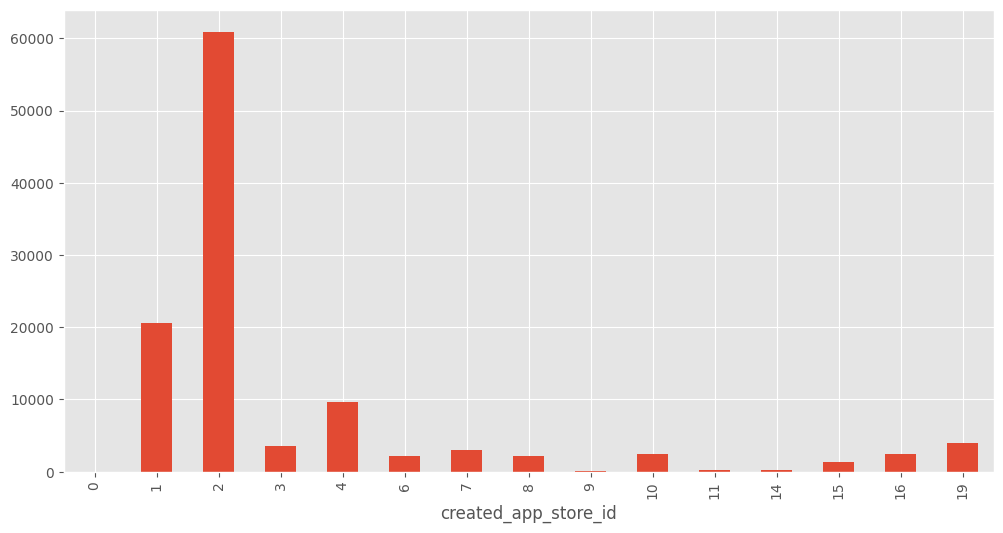

In [16]:
account.groupby(by = 'created_app_store_id').account_id.nunique().plot.bar()

See 2 major app store ids that have a lot more users than other stores.


<Axes: xlabel='country_code'>

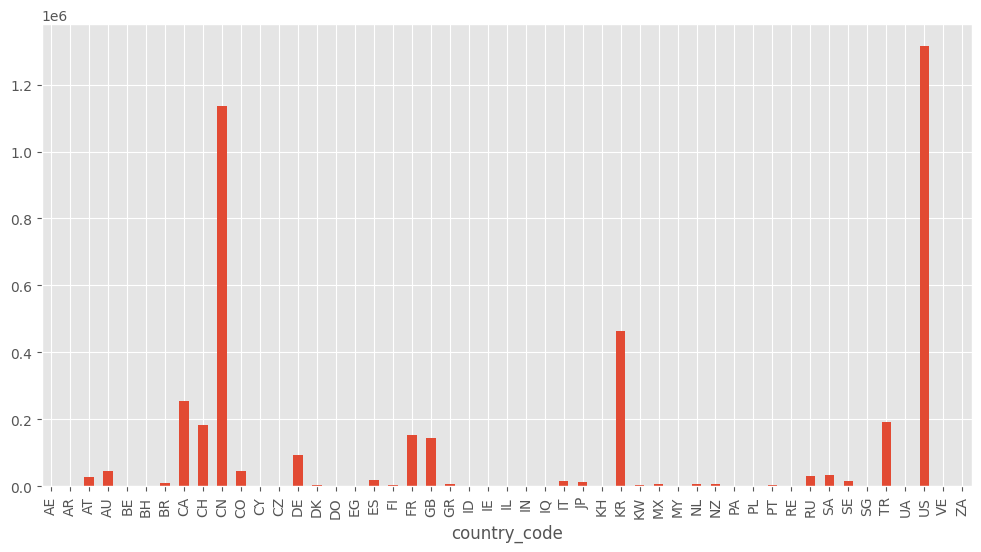

In [17]:
iap_purchase.merge(account, on = 'account_id').groupby(by = 'country_code').iap_price_usd_cents.sum().plot.bar()

<Axes: xlabel='country_code'>

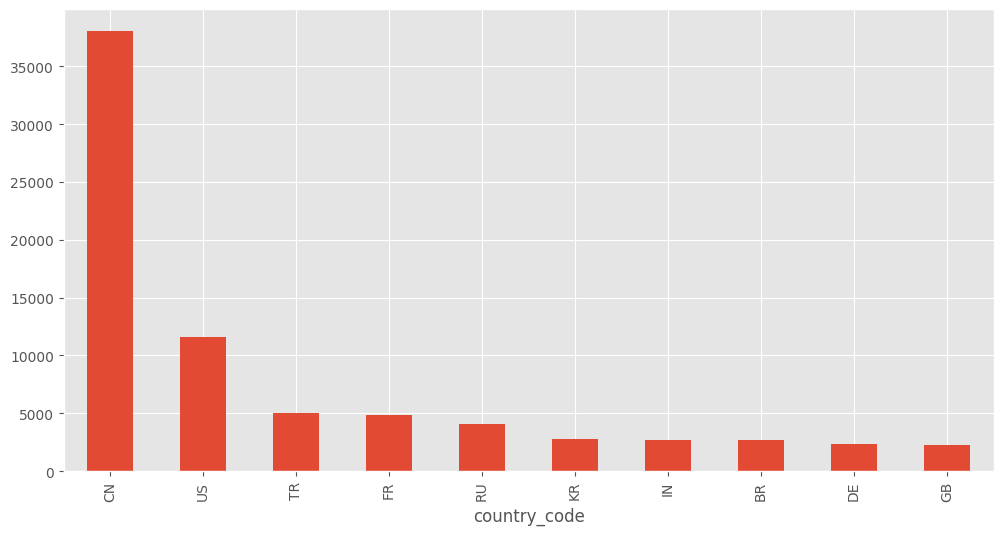

In [19]:
account.groupby(by = 'country_code').account_id.nunique().sort_values(ascending=False)[0:10].plot.bar()

China and US have more users than other countires. China specially has a lot users. 

Task 1. LTV

Define lifetime revenue, a short definition will do.
What proportion of lifetime revenue is generated on the player's first week in
game?
How would you assess if the LTV has gone down from January to December
based on the given data?

Lifetime revenue = the total amount in app purchases made by a users for his whole journey

In [20]:
iap_purchase.groupby('account_id').iap_price_usd_cents.sum()

account_id
12322622        328
12336472      18107
12348106       1105
12352080        184
12365400       1728
              ...  
8606270064     3322
8606366720     1477
8606420372      110
8606455880      474
8606555188      184
Name: iap_price_usd_cents, Length: 1549, dtype: int64

In [21]:
data2 = pd.read_sql_query("SELECT account.account_id, account.created_time as account_created_time, iap_purchase.created_time, iap_price_usd_cents from account join iap_purchase on account.account_id = iap_purchase.account_id", cnx)

In [22]:
data2.sample(5)

,account_id,account_created_time,created_time,iap_price_usd_cents
9503,4309071360,2016-04-16 02:26:34.115,2016-08-22 10:41:12.832,184
7616,25783032456,2016-02-28 14:55:58.22,2016-03-05 14:19:57.047,36
4200,68731230030,2016-01-18 07:08:27.156,2016-03-23 14:13:40.491,36
5114,42963423580,2016-04-21 03:31:57.439,2016-07-12 04:22:54.569,36
3716,17194475826,2016-06-21 08:59:57.534,2016-07-01 14:31:24.161,184


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_id            9909 non-null   object
 1   account_created_time  9909 non-null   object
 2   created_time          9909 non-null   object
 3   iap_price_usd_cents   9909 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 309.8+ KB


In [24]:
data2['created_time'] = pd.to_datetime(data2['created_time'])
data2['account_created_time'] = pd.to_datetime(data2['account_created_time'])

In [25]:
import datetime

In [26]:
data2[data2['created_time'] < data2['account_created_time'] + datetime.timedelta(days = 7)].groupby(by = 'account_id').iap_price_usd_cents.sum()

account_id
12322622       328
12348106      1105
12365955       923
12384825      3128
12392128        72
              ... 
8606270064    3322
8606366720    1477
8606420372     110
8606455880     438
8606555188     184
Name: iap_price_usd_cents, Length: 858, dtype: int64

In [27]:
data2.groupby(by = 'account_id').iap_price_usd_cents.sum()

account_id
12322622        328
12336472      18107
12348106       1105
12352080        184
12365400       1728
              ...  
8606270064     3322
8606366720     1477
8606420372      110
8606455880      474
8606555188      184
Name: iap_price_usd_cents, Length: 1549, dtype: int64

In [28]:
set1 = data2[data2['created_time'] <= data2['account_created_time'] + datetime.timedelta(days = 7)].groupby(by = 'account_id').iap_price_usd_cents.sum()
set2 = data2.groupby(by = 'account_id').iap_price_usd_cents.sum()



In [29]:
import statistics
statistics.mean(set1)/statistics.mean(set2)

0.3242495078248449

The first week of purchases accounts for roughly 32% of the LTV. 

In [30]:
data2.sample(5)

,account_id,account_created_time,created_time,iap_price_usd_cents
2080,34372736448,2016-02-24 11:06:20.231,2016-07-04 14:14:23.271,369
2395,42961616490,2016-01-02 01:55:33.219,2016-05-07 05:47:18.278,739
9764,8602747976,2016-02-03 21:46:31.048,2016-02-25 09:00:28.943,1849
1631,47256657572,2016-01-04 03:40:31.702,2016-11-20 06:52:25.080,739
5152,42963423580,2016-04-21 03:31:57.439,2016-10-27 15:20:46.229,36


In [31]:
data2[data2['created_time'].dt.month == 1].iap_price_usd_cents.sum()

593520

In [32]:
data2[data2['created_time'].dt.month == 12].iap_price_usd_cents.sum()

261343

In [33]:
data2['month_number'] = data2['created_time'].dt.month

In [34]:
data2.groupby(by = 'month_number').iap_price_usd_cents.sum()

month_number
1     593520
2     534301
3     430248
4     347749
5     299593
6     304555
7     315035
8     274350
9     228084
10    343680
11    319404
12    261343
Name: iap_price_usd_cents, dtype: int64

<Axes: xlabel='month_number'>

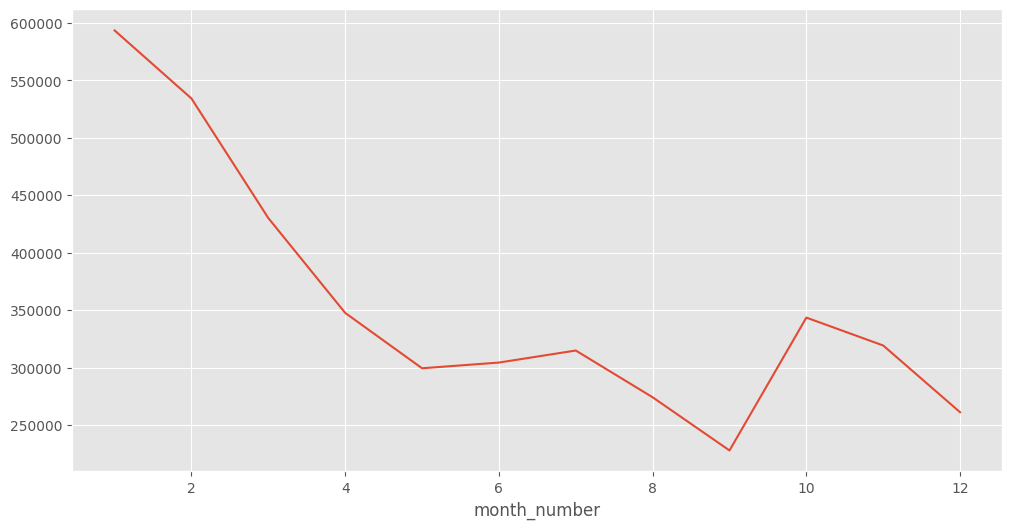

In [35]:
data2.groupby(by = 'month_number').iap_price_usd_cents.sum().plot()

In [36]:
merged1.sample(5)

,account_id,date,session_count,session_duration_sec,created_time,created_device,created_platform,country_code,created_app_store_id
1373918,60143001990,2016-12-30,4,3114,2016-05-16 02:38:26.661,MI 3C,Android,CN,6
1158357,47258937660,2016-06-17,21,9422,2016-06-08 16:00:59.264,"iPad5,3",iOS,CN,1
488579,34372147025,2016-10-31,2,1176,2016-01-22 10:18:43.755,"iPhone7,1",iOS,KR,1
1067906,4309171808,2016-08-13,1,338,2016-04-24 10:42:58.741,vivo X6L,Android,CN,16
1473583,47260441641,2016-11-15,1,330,2016-10-22 11:07:53.765,vivo X6L,Android,CN,4


In [37]:
account_date_session.sample(5)

,account_id,date,session_count,session_duration_sec
1443273,38668962170,2016-10-18,1,168
656460,47257745130,2016-05-27,4,1768
1206083,12900868281,2016-12-26,9,3676
205494,42961616490,2016-03-07,4,1846
869566,55846077742,2016-08-21,1,257


In [38]:
account_date_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698974 entries, 0 to 1698973
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   account_id            object
 1   date                  object
 2   session_count         int64 
 3   session_duration_sec  int64 
dtypes: int64(2), object(2)
memory usage: 51.8+ MB


In [39]:
merged1['date'] = pd.to_datetime(merged1['date'])

In [40]:
merged1['month_number'] = merged1['date'].dt.month

<Axes: xlabel='month_number'>

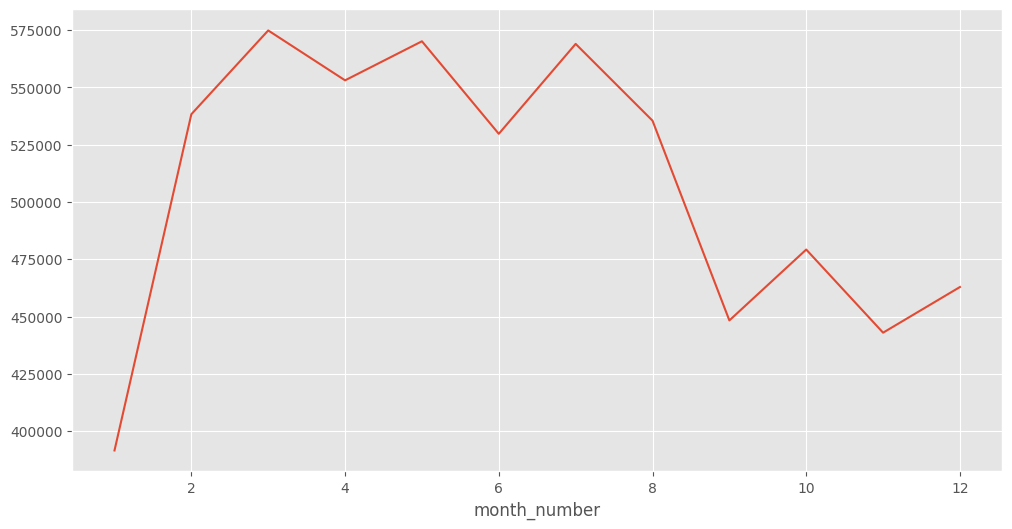

In [41]:
merged1.groupby(by = 'month_number').session_count.sum().plot()

<Axes: xlabel='month_number'>

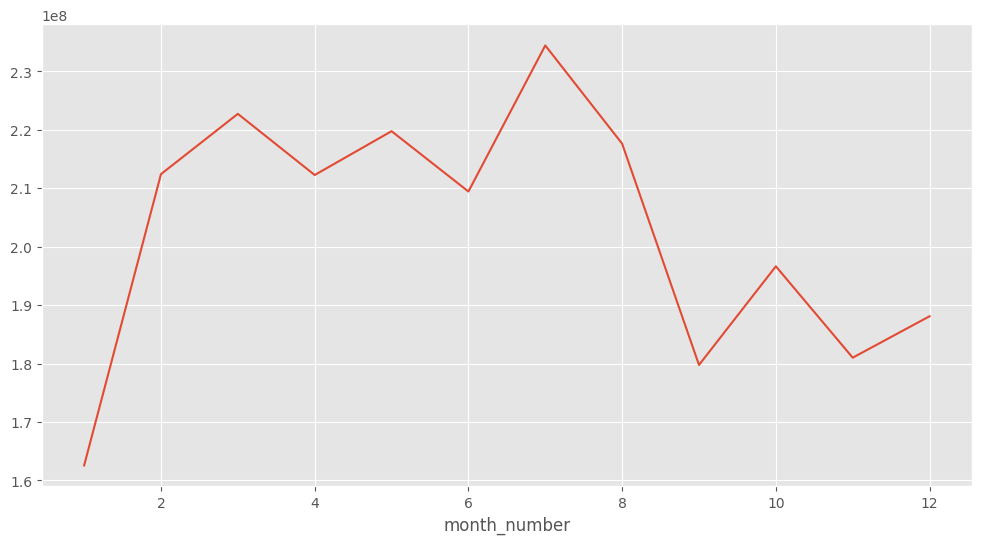

In [42]:
merged1.groupby(by = 'month_number').session_duration_sec.sum().plot()

In [43]:
merged1.sample(5)

,account_id,date,session_count,session_duration_sec,created_time,created_device,created_platform,country_code,created_app_store_id,month_number
1512344,4311415648,2016-12-02,1,220,2016-11-14 15:21:57.116,SM-T113,Android,IQ,2,12
761951,51551906400,2016-06-30,14,3573,2016-02-16 13:02:29.464,HTC Desire 310 dual sim,Android,RU,2,6
1476281,8606085460,2016-12-23,4,1337,2016-11-10 02:52:27.419,Redmi Note 3,Android,CN,4,12
721913,4308625625,2016-08-19,2,473,2016-03-12 16:42:01.905,"iPhone8,1",iOS,CN,1,8
275921,30077238610,2016-05-21,4,727,2016-01-24 18:53:06.161,SM-N910C,Android,AE,2,5


<Axes: xlabel='month_number'>

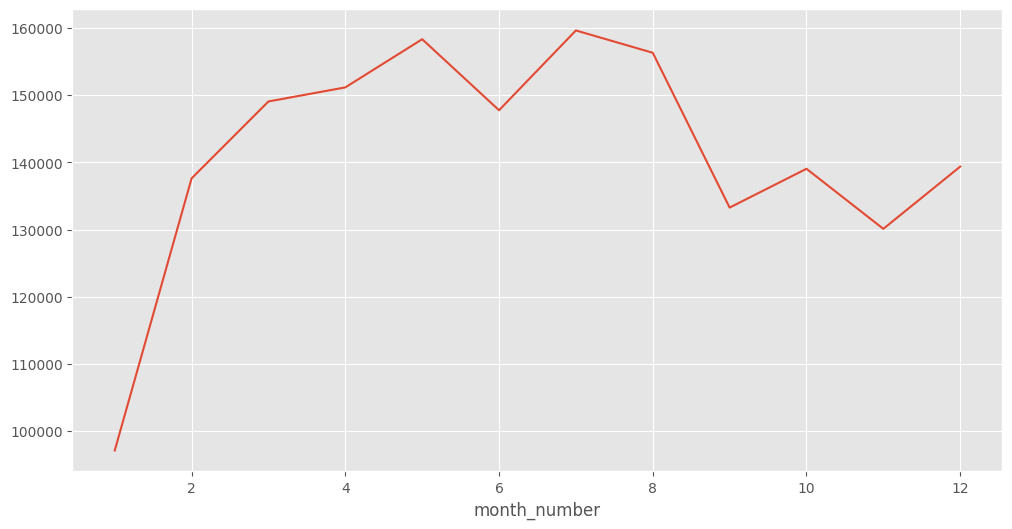

In [44]:
merged1.groupby(by = 'month_number').account_id.count().plot()

<Axes: xlabel='month_number'>

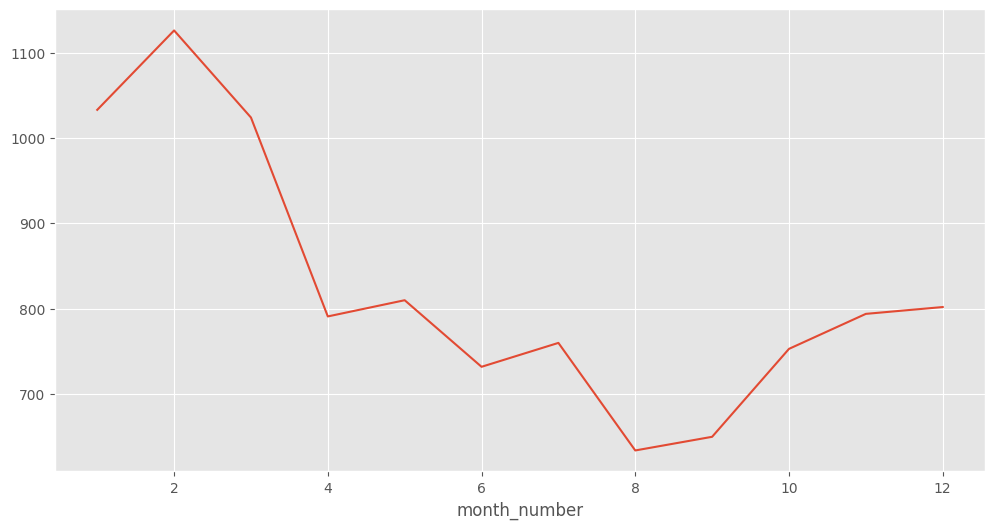

In [49]:
data2.groupby('month_number').account_id.count().plot()

<Axes: xlabel='month_number'>

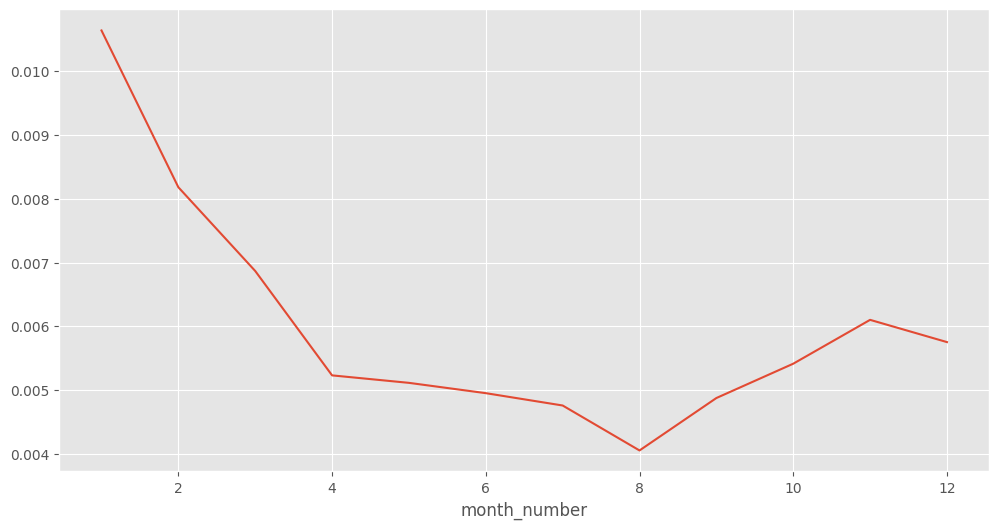

In [50]:
(data2.groupby('month_number').account_id.count()/merged1.groupby(by = 'month_number').account_id.count()).plot()

The percentage of active users keeps going down. This could be the reason that the LTV is going down from Janurary to December. This trend also aligns with the I_ap_purchases sum chart.

Task 2. Conclusions

Summarise the report so far
Evaluate what would be actionable based on the data OR if you need to have
something more to make it actionable, describe what and why and next steps
then.
For the second part you can also generate something new on the report if you find it
useful.

Based on my findings, I found out that a few countries have way more users and revenue than the other countires. I also found out that the revenue for the game keeps going down. One of the reasons that I found out could cause this problem is the number of users for the game is going down. 

In order to solve this decline. There are several steps I would take .

1. I will talk to other data analyst on the team. I would like to understand if this is happening to the whole company. Are other games also experiencing decline? Do we see some other user metrics that are not in this dataset that could potentially cause this?
2. I will investigate to understand what is exactly causing this issues. 
  1. Is it possible that we have a data logging error? I will check with the SDEs to investigate this. If that is the case I will work with them to correctly log the data.
  2. Is the company spending less marketing for the game? I will work with the marketing managers to understand if they are decresing marketing budget for the game. I will also work with them to see if increasing marketing could improve the revenue.
  3. Is there a competition from other games? I would like to work with the business experts in this issue to understand if competitors are stealing away our market shares for the game.
  4. If I have time, I would investigate the chinese market since it consists a large number of the users and revenue. Janurary to Feburary is also the Chinese New Year time, so naturally people will have a lot of time and play the games. 